 # Question c


In [ ]:
import numpy as np
import pandas as pd

## beta value

In [ ]:
beta = [0.3263116854084238, 0.49357456645769804, -0.02355774017834474, -0.00048044594543504777]# new_approach
#beta = [0.3212892703550074, 0.4767749032618438, -0.023165723309799064, -0.00046576011899774174] # biogeme_clean

### Use beta from Loglikelihood approach

In [ ]:
#Creat a metrix of products with various features and price
ind = range(1,31)
x1 = [8 if 6<=i and i<=15 else 4 for i in ind]
x2 = [2.9 if 6<=i and i<=20 else 2.2 if 26<=i else 3.2 for i in ind]
x3 = [95 if i<=5 or (11<=i and i<=15) and i<=20 else 135 if 26<=i else 60 for i in ind]
x4 = [3000-300*((i-1)%5) for i in ind]
x = np.array([x1,x2,x3,x4]).T
x #x is a metrix of all the different kind of product

array([[4.00e+00, 3.20e+00, 9.50e+01, 3.00e+03],
       [4.00e+00, 3.20e+00, 9.50e+01, 2.70e+03],
       [4.00e+00, 3.20e+00, 9.50e+01, 2.40e+03],
       [4.00e+00, 3.20e+00, 9.50e+01, 2.10e+03],
       [4.00e+00, 3.20e+00, 9.50e+01, 1.80e+03],
       [8.00e+00, 2.90e+00, 6.00e+01, 3.00e+03],
       [8.00e+00, 2.90e+00, 6.00e+01, 2.70e+03],
       [8.00e+00, 2.90e+00, 6.00e+01, 2.40e+03],
       [8.00e+00, 2.90e+00, 6.00e+01, 2.10e+03],
       [8.00e+00, 2.90e+00, 6.00e+01, 1.80e+03],
       [8.00e+00, 2.90e+00, 9.50e+01, 3.00e+03],
       [8.00e+00, 2.90e+00, 9.50e+01, 2.70e+03],
       [8.00e+00, 2.90e+00, 9.50e+01, 2.40e+03],
       [8.00e+00, 2.90e+00, 9.50e+01, 2.10e+03],
       [8.00e+00, 2.90e+00, 9.50e+01, 1.80e+03],
       [4.00e+00, 2.90e+00, 6.00e+01, 3.00e+03],
       [4.00e+00, 2.90e+00, 6.00e+01, 2.70e+03],
       [4.00e+00, 2.90e+00, 6.00e+01, 2.40e+03],
       [4.00e+00, 2.90e+00, 6.00e+01, 2.10e+03],
       [4.00e+00, 2.90e+00, 6.00e+01, 1.80e+03],
       [4.00e+00, 3.

In [ ]:
#The index of products a,b,c,d,e,f are of price 2700, 2400, 2700, 2100, 2400, 2400 is as floow: [1,7,11,18,22,27]

xc = x[[1,7,11,18,22,27]] #product list

w = xc[:,3] # prices
v = np.exp(np.dot(beta, xc.T)) # watch for overflow, calculate for utility

print(f"The products are: \n{xc}")
print(f"The price is: {w}")
print(f"The utility is: {v}")

The products are: 
[[4.00e+00 3.20e+00 9.50e+01 2.70e+03]
 [8.00e+00 2.90e+00 6.00e+01 2.40e+03]
 [8.00e+00 2.90e+00 9.50e+01 2.70e+03]
 [4.00e+00 2.90e+00 6.00e+01 2.10e+03]
 [4.00e+00 3.20e+00 6.00e+01 2.40e+03]
 [4.00e+00 2.20e+00 1.35e+02 2.40e+03]]
The price is: [2700. 2400. 2700. 2100. 2400. 2400.]
The utility is: [0.52178272 4.37245679 1.65975559 1.36918009 1.37458336 0.14338035]


In [ ]:
def z(S): #function to calculate the revenue 
    return np.dot(w[S],v[S])/(np.sum(v[S])+1)

In [ ]:
# try all combinations
from itertools import combinations

z_list = [] #list of revenue
S_list = [] #list of possible assortmnet
Szall_list = []
for r in range(1, 4):
    for S in combinations(range(0,6), r):
        S = list(S)
        S_chr = [chr(ord('a')+n) for n in S]
        S_list.append(S_chr)
        z_list.append(z(S))
        Szall_list.append([S_chr, z(S)])
Szall_list

[[['a'], 925.7651125633203],
 [['b'], 1953.27700293793],
 [['c'], 1684.8691321461254],
 [['d'], 1213.6174044276013],
 [['e'], 1389.2963792868654],
 [['f'], 300.96094903960125],
 [['a', 'b'], 2019.3800444536955],
 [['a', 'c'], 1851.3539257328202],
 [['a', 'd'], 1481.890920473609],
 [['a', 'e'], 1625.4207108255962],
 [['a', 'f'], 1052.7054191287039],
 [['b', 'c'], 2129.5199263474638],
 [['b', 'd'], 1983.0754347048933],
 [['b', 'e'], 2044.2884664130927],
 [['b', 'f'], 1964.8892563512395],
 [['c', 'd'], 1825.9458245931205],
 [['c', 'e'], 1928.5291229431248],
 [['c', 'f'], 1721.4480618878436],
 [['d', 'e'], 1649.2169809805066],
 [['d', 'f'], 1281.3188401264908],
 [['e', 'f'], 1446.8488516003692],
 [['a', 'b', 'c'], 2168.9251208999563],
 [['a', 'b', 'd'], 2034.5771890700403],
 [['a', 'b', 'e'], 2091.3578414598664],
 [['a', 'b', 'f'], 2028.4189410400372],
 [['a', 'c', 'd'], 1926.1643676514084],
 [['a', 'c', 'e'], 2016.8806211057836],
 [['a', 'c', 'f'], 1875.0131706420664],
 [['a', 'd', 'e'], 

In [ ]:
Sz_df = pd.DataFrame(Szall_list, columns=["Assortment", "Predicted Revenue"])
Sz_df.sort_values("Predicted Revenue", ascending=False, inplace=True)
Sz_df[:3] # top three predicted assortments for this beta

,Assortment,Predicted Revenue
32,"[b, c, e]",2173.745743
21,"[a, b, c]",2168.925121
33,"[b, c, f]",2134.924571


### Use beta from Biogeme approach

In [ ]:
beta = [0.3212892703550074, 0.4767749032618438, -0.023165723309799064, -0.00046576011899774174] # biogeme_clean

In [ ]:
#The index of products a,b,c,d,e,f are of price 2700, 2400, 2700, 2100, 2400, 2400 is as floow: [1,7,11,18,22,27]

xc = x[[1,7,11,18,22,27]] #product list

w = xc[:,3] # prices
v = np.exp(np.dot(beta, xc.T)) # watch for overflow, calculate for utility

print(f"The products are: \n{xc}")
print(f"The price is: {w}")
print(f"The utility is: {v}")

The products are: 
[[4.00e+00 3.20e+00 9.50e+01 2.70e+03]
 [8.00e+00 2.90e+00 6.00e+01 2.40e+03]
 [8.00e+00 2.90e+00 9.50e+01 2.70e+03]
 [4.00e+00 2.90e+00 6.00e+01 2.10e+03]
 [4.00e+00 3.20e+00 6.00e+01 2.40e+03]
 [4.00e+00 2.20e+00 1.35e+02 2.40e+03]]
The price is: [2700. 2400. 2700. 2100. 2400. 2400.]
The utility is: [0.52337384 4.24267386 1.63994933 1.34954116 1.35400801 0.1479124 ]


In [ ]:
# this could be used to show that we have tried all combinations
from itertools import combinations

z_list = []
S_list = []
Szall_list = []
for r in range(1, 4):
    for S in combinations(range(0,6), r):
        S = list(S)
        S_chr = [chr(ord('a')+n) for n in S]
        S_list.append(S_chr)
        z_list.append(z(S))
        Szall_list.append([S_chr, z(S)])
Szall_list

[[['a'], 927.6182494009594],
 [['b'], 1942.2183291288743],
 [['c'], 1677.2530984948496],
 [['d'], 1206.2084645647058],
 [['e'], 1380.462261217097],
 [['f'], 309.24812959295303],
 [['a', 'b'], 2011.000816909471],
 [['a', 'c'], 1846.467227810729],
 [['a', 'd'], 1478.3402251401437],
 [['a', 'e'], 1620.4761259963352],
 [['a', 'f'], 1057.927178200167],
 [['b', 'c'], 2122.777907996908],
 [['b', 'd'], 1974.5189835090505],
 [['b', 'e'], 2036.1807271971352],
 [['b', 'f'], 1954.7794092962988],
 [['c', 'd'], 1820.2574106010018],
 [['c', 'e'], 1922.274516658444],
 [['c', 'f'], 1715.5990567642116],
 [['d', 'e'], 1642.6555656713153],
 [['d', 'f'], 1276.9111096215054],
 [['e', 'f'], 1440.736870534509],
 [['a', 'b', 'c'], 2163.569572300798],
 [['a', 'b', 'd'], 2027.8803841510955],
 [['a', 'b', 'e'], 2084.97608195891],
 [['a', 'b', 'f'], 2020.7299666207382],
 [['a', 'c', 'd'], 1922.284466218304],
 [['a', 'c', 'e'], 2012.3810771757376],
 [['a', 'c', 'f'], 1871.1934544996345],
 [['a', 'd', 'e'], 1773.575

In [ ]:
Sz_df = pd.DataFrame(Szall_list, columns=["Assortment", "Predicted Revenue"])
Sz_df.sort_values("Predicted Revenue", ascending=False, inplace=True)
Sz_df[:3] # top three predicted assortments for this beta

,Assortment,Predicted Revenue
32,"[b, c, e]",2168.350051
21,"[a, b, c]",2163.569572
33,"[b, c, f]",2128.610264


# Graphical Method

In [ ]:
import numpy as np
#beta = [0.3212892703550074, 0.4767749032618438, -0.023165723309799064, -0.00046576011899774174] # from quesiton (a)
beta = [0.3263116854084238, 0.49357456645769804, -0.02355774017834474, -0.00048044594543504777] # new_approach
x_a = [4, 3.2, 95]
x_b = [8, 2.9, 60]
x_c = [8, 2.9, 95]
x_d = [4, 2.9, 60]
x_e = [4, 3.2, 60]
x_f = [4, 2.2, 135] #here, was wrong, i have modified
b = beta[3]

# Respective utility
u_a = np.dot(beta[:3], x_a)+2700*b
u_b = np.dot(beta[:3], x_b)+2400*b
u_c = np.dot(beta[:3], x_c)+2700*b
u_d = np.dot(beta[:3], x_d)+2100*b
u_e = np.dot(beta[:3], x_e)+2400*b
u_f = np.dot(beta[:3], x_f)+2400*b

# Respective valuation
v_a = np.exp(u_a)
v_b = np.exp(u_b)
v_c = np.exp(u_c)
v_d = np.exp(u_d)
v_e = np.exp(u_e)
v_f = np.exp(u_f)

v_a,v_b,v_c,v_d,v_e,v_f

(0.521782723989165,
 4.37245679265205,
 1.6597555896494107,
 1.3691800927610551,
 1.3745833603589968,
 0.14338034773669353)

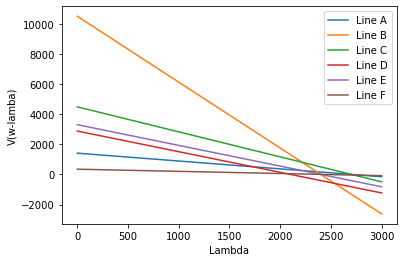

Line A intersects Line B at x=2356.71343, y=179.12100
Line A intersects Line C at x=2699.39880, y=0.31370
Line A intersects Line D at x=1725.45090, y=508.50288
Line A intersects Line E at x=2212.42485, y=254.40829
Line A intersects Line F at x=2813.62725, y=-59.28874
Line B intersects Line C at x=2212.42485, y=820.16424
Line B intersects Line D at x=2531.06212, y=-573.06348
Line B intersects Line E at x=2398.79760, y=5.25746
Line B intersects Line F at x=2398.79760, y=5.25746
Line C intersects Line F at x=2723.44689, y=-38.91611
Line D intersects Line F at x=2062.12425, y=51.85872
Line E intersects Line F at x=2398.79760, y=1.65281
[2356.7134268537075, 2699.3987975951904, 1725.4509018036072, 2212.4248496993987, 2813.627254509018, 2212.4248496993987, 2531.0621242484967, 2398.797595190381, 2398.797595190381, 2723.446893787575, 2062.124248496994, 2398.797595190381]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


lamb_range = np.linspace(0, 3000, 500)

y_a = v_a*(2700-lamb_range)
y_b = v_b*(2400-lamb_range)
y_c = v_c*(2700-lamb_range)
y_d = v_d*(2100-lamb_range)
y_e = v_e*(2400-lamb_range)
y_f = v_f*(2400-lamb_range)


plt.plot(lamb_range, y_a, label='Line A')
plt.plot(lamb_range, y_b, label='Line B')
plt.plot(lamb_range, y_c, label='Line C')
plt.plot(lamb_range, y_d, label='Line D')
plt.plot(lamb_range, y_e, label='Line E')
plt.plot(lamb_range, y_f, label='Line F')

plt.xlabel('Lambda')
plt.ylabel('V(w-lamba)')
plt.legend()


plt.show()

# Find the intersection points
lines = [y_a, y_b, y_c, y_d, y_e, y_f]
names = ['Line A', 'Line B', 'Line C', 'Line D', 'Line E', 'Line F']
intersections = []
lamb =[]
for i in range(len(lines)):
    for j in range(i+1, len(lines)):
        x = np.argwhere(np.diff(np.sign(lines[i] - lines[j]))).flatten()
        if len(x) > 0:
            x = x[0]
            intersections.append((names[i], names[j], lamb_range[x], lines[i][x]))
            lamb.append(lamb_range[x])

# Print the intersection points and which lines intersect
for i in range(len(intersections)):
    print(f"{intersections[i][0]} intersects {intersections[i][1]} at x={intersections[i][2]:.5f}, y={intersections[i][3]:.5f}")
print (lamb)

In [ ]:
intersections #These are the intersections

[('Line A', 'Line B', 2356.7134268537075, 179.1210032451783),
 ('Line A', 'Line C', 2699.3987975951904, 0.3136970284503665),
 ('Line A', 'Line D', 1725.4509018036072, 508.5028831180981),
 ('Line A', 'Line E', 2212.4248496993987, 254.40829007327432),
 ('Line A', 'Line F', 2813.627254509018, -59.28873837712544),
 ('Line B', 'Line C', 2212.4248496993987, 820.1642400645935),
 ('Line B', 'Line D', 2531.0621242484967, -573.0634754297465),
 ('Line B', 'Line E', 2398.797595190381, 5.257463077336577),
 ('Line B', 'Line F', 2398.797595190381, 5.257463077336577),
 ('Line C', 'Line F', 2723.446893787575, -38.91611302384354),
 ('Line D', 'Line F', 2062.124248496994, 51.85872495628055),
 ('Line E', 'Line F', 2398.797595190381, 1.6528056437180572)]

In [ ]:
len(intersections)

12

In [ ]:
intersecX = [intersections[i][2] for i in range(len(intersections))] #X axis of the intersect

In [ ]:
def selectTop3(inter):
    xCoordi = inter - 0.1 #off set the coordinate
    y_a = v_a*(2700-xCoordi)
    y_b = v_b*(2400-xCoordi)
    y_c = v_c*(2700-xCoordi)
    y_d = v_d*(2100-xCoordi)
    y_e = v_e*(2400-xCoordi)
    y_f = v_f*(2400-xCoordi)
    lineDic = {
        y_a:"a",
        y_b:"b",
        y_c:"c",
        y_d:"d",
        y_e:"e",
        y_f:"f",
    }
    
    outPut = [y_a, y_b, y_c, y_d, y_e, y_f]
    outPut.sort(reverse=True)
    outPut = outPut[:3]
    #outPut = [i for i in outPut if i >=0]#remove negative from list

    assort = [lineDic.get(i) for i in outPut] 
    print("For intersection x = "+ str(inter))
    print("Selected products are")
    print(assort)
    print("Their y-values are")
    print(outPut)
    print("____________________")
    return assort

In [ ]:
bigS = []
for i in intersecX:
    bigS.append(selectTop3(i)) #print out all assortment and their y values

For intersection x = 2356.7134268537075
Selected products are
['c', 'b', 'a']
Their y-values are
[569.9377841901152, 189.70591646340145, 179.17318151757715]
____________________
For intersection x = 2699.3987975951904
Selected products are
['c', 'a', 'f']
Their y-values are
[1.1638246108581176, 0.3658753008492356, -42.91356567637267]
____________________
For intersection x = 1725.4509018036072
Selected products are
['b', 'c', 'e']
Their y-values are
[2949.8740320653974, 1617.6792886782202, 927.3614244619644]
____________________
For intersection x = 2212.4248496993987
Selected products are
['b', 'c', 'e']
Their y-values are
[820.6014857438582, 809.4215566445394, 257.9751387560802]
____________________
For intersection x = 2813.627254509018
Selected products are
['a', 'f', 'c']
Their y-values are
[-59.23656010472658, -59.291681550103156, -188.4274952488937]
____________________
For intersection x = 2212.4248496993987
Selected products are
['b', 'c', 'e']
Their y-values are
[820.60148574

In [ ]:
zList = []
for j in bigS:
    wvlist = [] #[0] is the w; [1] is the v
    for i in j:
        if i == 'a':
            w = 2700
            v = v_a
        elif i == 'b':
            w = 2400
            v = v_b
        elif i == 'c':
            w = 2700
            v = v_c
        elif i == 'd':
            w = 2100
            v = v_d
        elif i == 'e':
            w = 2400
            v = v_e
        elif i == 'f':
            w = 2400
            v = v_f
        wvlist.append([w,v])
    upper = 0
    lower = 1
    
    for w in wvlist:
        nomi = w[0]*w[1]
        upper += nomi
        lower += w[1]
    Z = upper/lower
    zList.append(Z)

In [ ]:
result = {
    "assortment" :bigS,
    "Z" : zList
}
result = pd.DataFrame(data = result)
result

,assortment,Z
0,"[c, b, a]",2168.925121
1,"[c, a, f]",1875.013171
2,"[b, c, e]",2173.745743
3,"[b, c, e]",2173.745743
4,"[a, f, c]",1875.013171
5,"[b, c, e]",2173.745743
6,"[c, a, f]",1875.013171
7,"[c, a, b]",2168.925121
8,"[c, a, b]",2168.925121
9,"[a, c, f]",1875.013171


In [ ]:
result = result.sort_values(by = ['Z'],ascending=False)

In [ ]:
result

,assortment,Z
2,"[b, c, e]",2173.745743
3,"[b, c, e]",2173.745743
5,"[b, c, e]",2173.745743
10,"[b, c, e]",2173.745743
0,"[c, b, a]",2168.925121
7,"[c, a, b]",2168.925121
8,"[c, a, b]",2168.925121
11,"[c, a, b]",2168.925121
1,"[c, a, f]",1875.013171
4,"[a, f, c]",1875.013171


In [ ]:
result["assortment"]= result.assortment.apply(lambda x: sorted(x))
result["Z"] = result.Z.round(decimals=2)

In [ ]:
result

,assortment,Z
2,"[b, c, e]",2173.75
3,"[b, c, e]",2173.75
5,"[b, c, e]",2173.75
10,"[b, c, e]",2173.75
0,"[a, b, c]",2168.93
7,"[a, b, c]",2168.93
8,"[a, b, c]",2168.93
11,"[a, b, c]",2168.93
1,"[a, c, f]",1875.01
4,"[a, c, f]",1875.01


In [ ]:
result=result.drop_duplicates(subset="Z", keep = "first")
result.head(3)

,assortment,Z
2,"[b, c, e]",2173.75
0,"[a, b, c]",2168.93
1,"[a, c, f]",1875.01
